In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130811 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

# Analysing House Prices Through Regression






## Choosing "x":

In [ ]:
from google.colab import files

In [ ]:
import time

Importing Required Libraries:

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [ ]:
!pip install sklearn.cross_validation

  ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
from sklearn.linear_model import LinearRegression 

Importing the data:

In [ ]:
dataset = pd.read_csv('drive/house_data.csv')

In [ ]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Looking at the correlation to determine our x-variable:

In [ ]:
dataset.corr()[:2]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447


Hence, we use sqft_living as our independant variable, as it has correlation 0.7 

## Splitting the data to use for our regression model

In [ ]:
space = dataset['sqft_living']
price=dataset['price']

In [ ]:
x = np.array(space)
y = np.array(price) #reshapes all values of Y or house price to an array

In [ ]:
print(x)

[1180 2570  770 ... 1020 1600 1020]


Using N = 14, 400 readings of the total 21, 613 readings as our input size N, to calculate our regression line.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=14400, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## The Regression Algorithm

### Calculating coefficients

In [ ]:
start=time.time()

In [ ]:
x_mean = float(np.mean(xtrain))
y_mean = float(np.mean(ytrain))

mean=sum of values/ number of values 
as if n is the number of value then computational complexity of the mean would mostly depend on the time it takes to sum n terms. Therefore complexity is O(n) for this block.

In [ ]:
XY = np.multiply(xtrain,ytrain)

Assuming it takes T(1) time to calculate one multiplication process. it will take nT(1) time to calculaten multiplication processes so the complexity will be O(n).

In [ ]:
XYmean = float(np.mean(XY))

O(n) complexity for mean.


In [ ]:
Xsqr = np.square(xtrain)
Xmeansqr = np.square(x_mean)

O(n) complexity for squaring n inputs.
O(n) complexity for mean of n inputs

In [ ]:
Xsqrmean = float(np.mean(Xsqr))

O(n) complexity for mean of n inputs

In [ ]:
b = ((x_mean)*(y_mean) - (XYmean)) / ((Xmeansqr) - (Xsqrmean))

b is calculated in constant time therefore complexity is O(1).

In [ ]:
print(b)

273.78254683318926


In [ ]:
a = y_mean - (b* x_mean)

a is calculated in constant time there complexity is O(1).

In [ ]:
n = 14400

In [ ]:
sumx = np.sum(xtrain)
sumy = np.sum(ytrain)
sumxy = np.sum(XY)
sumXsqr = np.sum(Xsqr)
sqrXsum = np.square(sumx)

total complexity of this code block is O(n)+O(n)+O(n)+O(n)+O(n) which is equal to O(n)

If we sum up all the complexities of the code blocks it will add up to O(n) which is the complexity of this algorithm.

###Making predictions

making a list of the predictions i.e. values for Y^

In [ ]:
predictions = list()

use the coefficients to estimate from the test set.

In [ ]:
for row in xtest:
  predY = a + b*row
  predictions.append(predY)

In [ ]:
end=time.time()
print (end-start)

0.2026364803314209


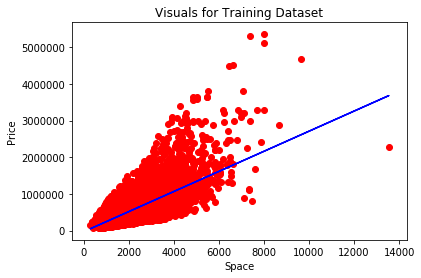

In [ ]:



#Visualizing the training Test Results 

plt.plot(xtrain, a + b*xtrain , color = 'blue')

plt.scatter(xtrain, ytrain, color= 'red')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()



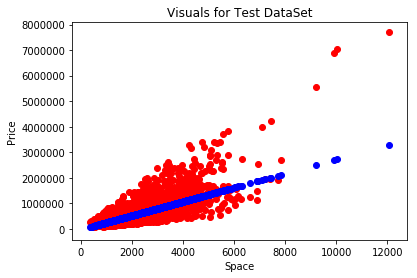

In [ ]:
#Visualizing the Test Results 
plt.scatter(xtest, ytest, color= 'red')
plt.scatter(xtest, predictions , color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(predictions, ytest))

In [ ]:
print(rms)

268528.51829181344


## Looking at PCA

**Using PCA to extract the most important features from the dataset that are responsible for maximum variance in the output**

1.   Calculate covariance matrix
2.   Calculate eigen values and eigen vectors of this covariance matrix



Covariance matrix computation is  O(np²); its eigen-value decomposition is O(p^3). So, the complexity of PCA is O(np²+p3)

 covariance matrix computation is matrix multiplication which is  in **O(np²)** since you have to do roughly N operations to fill every of the p² positions in your covariance matrix

In [ ]:
startPCA=time.time()

In [ ]:
features = ['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors','waterfront',	'view',	'condition'	,'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'zipcode','lat',	'long',	'sqft_living15',	'sqft_lot15']
# Separating out the features
xPCA = (dataset.loc[:,features]).values

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
xPCA = StandardScaler().fit_transform(xPCA)

In [ ]:
yPCA = dataset.loc[:,['price']].values 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(xPCA)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head()

,principal component 1,principal component 2
0,-2.647852,-0.045169
1,-0.234486,1.682909
2,-2.570083,-0.614848
3,-1.220272,2.076699
4,-0.286451,-1.117934


In [ ]:
principalComponents

array([[-2.6478517 , -0.0451686 ],
       [-0.23448627,  1.68290864],
       [-2.57008329, -0.61484829],
       ...,
       [-2.41985604, -1.10012324],
       [ 0.33218342, -1.88038866],
       [-2.43180405, -1.08491306]])

In [ ]:
yPCA

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principalComponents, yPCA, test_size=1/3, random_state=0)

In [ ]:
Mregressor = LinearRegression()  
Mregressor.fit(X_train_pca, y_train_pca) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
predPCA = Mregressor.predict(X_test_pca)



In [ ]:
endPCA=time.time()
print (endPCA-startPCA)

0.2267000675201416


In [ ]:
rmsPCA = sqrt(mean_squared_error(y_test_pca, predPCA))

In [ ]:
print (rmsPCA)

247033.9610669875
